# Finding optimal hyper parameters for a CNN model

The point of this notebook is to obtain an optimal set of parameters for our CNN model to process time based series data. Specifically, we are processing IoT data from TON a well-kept dataset from The UNSW Group in Canberra, Australia.

The specific dataset being discussed here is the IoT Modbus dataset.



We have pip install mealpy each time because it is not a default python package ,and every time the runtime refreshes; the package is uninstalled.

In [ ]:
%pip install mealpy==3.0.1
%pip install -U scikit-learn
%pip install imbalanced-learn
%pip install matplotlib
%pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 29.2 MB/s eta 0:00:00


Our main libraries used are:

*   Imblearn
*   Pandas
*   Matplot Lib
*   MealPy
*   Numpy
*   SKLearn
*   Tensorflow
*   Time



In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from imblearn.combine import SMOTETomek
import numpy
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from mealpy import FloatVar, FOX
import time

# Preparing the Datasets for the CNN Model

We split off the information that indicates whether or not an attack has occured (*label*) and the types of attacks (*type*).
Now there are three dataframes:
  X - all features
  y - attack or not
  y_type - type of attack

We split again into test and train data sets and include some randomness.
**Reset_index** drops the indexes from these new dataframes.
Next, we encode the text data, add another randomness, and scale all dataframes. The X dataframe is reshaped.

In [ ]:
#Uncomment for local use
#raw_data = pandas.read_csv('../../Train_Test_IoT_dataset/Train_Test_IoT_Modbus.csv')
#Uncomment for Google Colab
raw_data = pandas.read_csv('Train_Test_IoT_Modbus.csv')
X = raw_data.drop(columns=['label','type'])
y = raw_data['label']
y_type = raw_data['type']

In [ ]:
# Binary
X_train, X_testsplit, y_train, y_testsplit = train_test_split(X, y, test_size=0.2, random_state=777)
# Binary validation
X_test, X_validation, y_test, y_validation = train_test_split(X_testsplit, y_testsplit, test_size=0.5, random_state=777)

#drop index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_validation = X_validation.reset_index(drop=True)
y_validation = y_validation.reset_index(drop=True)

In [ ]:
encoder = OrdinalEncoder()
label_encoder = LabelEncoder()
X_train_encode = encoder.fit_transform(X_train)
X_test_encode = encoder.fit_transform(X_test)
y_train_encode = label_encoder.fit_transform(y_train)
y_test_encode = label_encoder.fit_transform(y_test)
X_validation_encode = encoder.fit_transform(X_validation)
y_validation_encode = label_encoder.fit_transform(y_validation)

In [ ]:
smotetomek = SMOTETomek(random_state=777)
X_rebalance, y_rebalance = smotetomek.fit_resample(X_train_encode, y_train_encode)

In [ ]:
scaler = StandardScaler()
X_rebalance = scaler.fit_transform(X_rebalance)
X_test_encode = scaler.transform(X_test_encode)

X_validation_encode = scaler.transform(X_validation_encode)

In [ ]:
X_rebalance = X_rebalance.reshape(X_rebalance.shape[0], X_rebalance.shape[1], 1)
X_test_encode = X_test_encode.reshape(X_test_encode.shape[0], X_test_encode.shape[1], 1)

X_validation_encode = X_validation_encode.reshape(X_validation_encode.shape[0], X_validation_encode.shape[1], 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 4, 50)               │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 2, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2, 50)               │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          29,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,633 (248.57 KB)

 Trainable params: 63,533 (248.18 KB)

 Non-trainable params: 100 (400.00 B)

Epoch 1/70
403/403 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5028 - loss: 0.6941 - val_accuracy: 0.5580 - val_loss: 0.6922
Epoch 2/70
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5125 - loss: 0.6926 - val_accuracy: 0.7991 - val_loss: 0.6916
Epoch 3/70
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5161 - loss: 0.6924 - val_accuracy: 0.6455 - val_loss: 0.6914
Epoch 4/70
403/403 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5167 - loss: 0.6925 - val_accuracy: 0.5172 - val_loss: 0.6912
Epoch 5/70
403/403 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5221 - loss: 0.6920 - val_accuracy: 0.5172 - val_loss: 0.6909
Epoch 6/70
403/403 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5257 - loss: 0.6916 - val_accuracy: 0.5172 - val_loss: 0.6906
Epoch 7/70
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5225 - loss: 0.6915 - val_accuracy: 0.5172 - val_loss: 0.6904
Epoch 8/70
403/403 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5298 - loss: 0.6910 - val_accuracy: 0

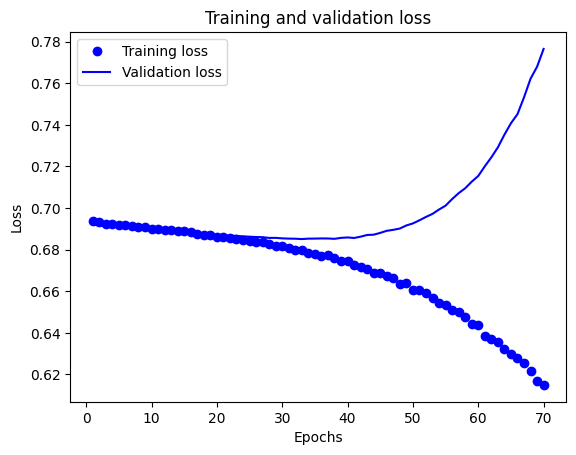

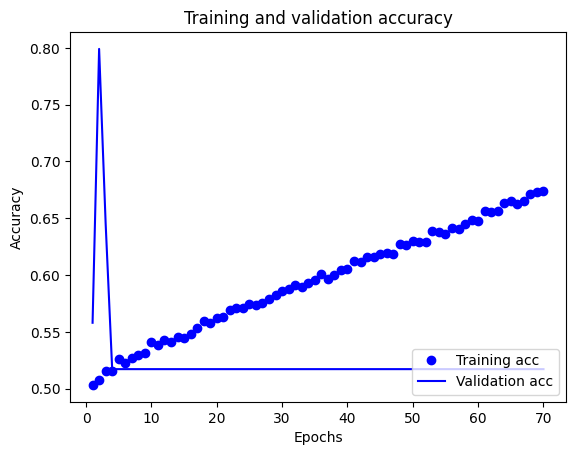


Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1491
           1       0.52      1.00      0.68      1620

    accuracy                           0.52      3111
   macro avg       0.26      0.50      0.34      3111
weighted avg       0.27      0.52      0.36      3111


Confusion Matrix
[[   0 1491]
 [   0 1620]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


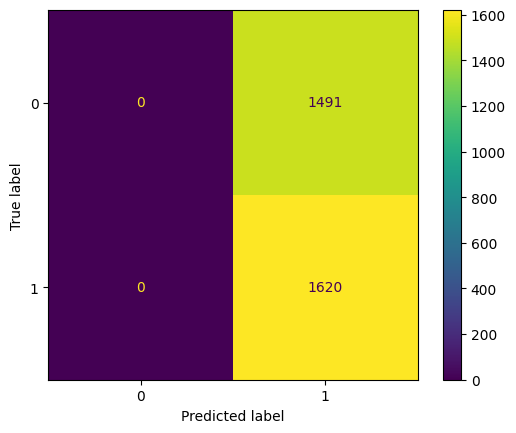

Time taken: 242.7835 seconds


In [ ]:
start_time_1 = time.perf_counter()
with tensorflow.device('/device:GPU:0'):
  # CNN model detection
  # https://keras.io/api/layers/activations/#softmax-function
  detection_model = tensorflow.keras.Sequential([
      tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1],X_rebalance.shape[2])),
      tensorflow.keras.layers.Conv1D(filters=50, kernel_size=3, activation='sigmoid'),
      tensorflow.keras.layers.MaxPooling1D(pool_size=2),
      tensorflow.keras.layers.Dropout(0.3),
      tensorflow.keras.layers.BatchNormalization(),
      tensorflow.keras.layers.LSTM(64),
      tensorflow.keras.layers.Flatten(),
      # 1 layer
      tensorflow.keras.layers.Dense(512, activation='relu'),
      tensorflow.keras.layers.Dropout(0.5),
      # either attack or normal
      tensorflow.keras.layers.Dense(1, activation='sigmoid')
  ])

  detection_model.summary()
  # https://keras.io/api/losses/probabilistic_losses/#probabilistic-losses
  sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.001)
  detection_model.compile(optimizer=sgd,
                loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

  history = detection_model.fit(X_rebalance, y_rebalance, batch_size=64, epochs=70, validation_data=(X_validation_encode, y_validation_encode))
  test_loss, test_acc = detection_model.evaluate(X_test_encode, y_test_encode)

  # Make predictions
  prediction = detection_model.predict(X_test_encode)
  print(prediction)
  attack_prediction = numpy.where(prediction > 0.5, 1, 0)
  print(attack_prediction)
  print(y_test)

  # Evaluate the model
  print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}\n")
  # https://www.tensorflow.org/tutorials/keras/text_classification for training and validation loss and accuracy
  history_dict = history.history
  # print(history_dict.keys())
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print("\n")

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  print("\nClassification Report")
  print(classification_report(y_test, attack_prediction))

  print("\nConfusion Matrix")
  print(confusion_matrix(y_test, attack_prediction))
  ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
  plt.show()

end_time1 = time.perf_counter()
print(f"Time taken: {end_time1 - start_time_1:0.4f} seconds")

# Optimizing the model
Instead of looking at random number ranges for learning rates, filters, and hidden units, we have encoded specific values.

The hyper parameters we are attempting to optimize are:

*   Batch Size
*   Activation Functions
*   Learning Rates
*   Filters
*   Hidden Units


The base CNN model we made is ingested into *objective_function*.
  This is where our hyper parameters are being considered.
  It returns the Accuracy of that particular iteration.
**LB** and **UB** is set according to the list given above.



2025/04/12 09:48:35 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: Solving single objective optimization problem.


Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4975891709327698
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.482802927

2025/04/12 10:17:55 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 1, Current best: 0.4828029274940491, Global best: 0.4828029274940491, Runtime: 924.06704 seconds


Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.30215364694595337
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491


2025/04/12 10:33:11 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 2, Current best: 0.30215364694595337, Global best: 0.30215364694595337, Runtime: 915.36836 seconds


Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285


2025/04/12 10:51:01 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 3, Current best: 0.4828029274940491, Global best: 0.30215364694595337, Runtime: 1070.28478 seconds


Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.41883641481399536
Accuracy 0.5171970427036285


2025/04/12 11:09:54 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 4, Current best: 0.41883641481399536, Global best: 0.30215364694595337, Runtime: 1132.71325 seconds


Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4779813289642334
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491


2025/04/12 11:27:59 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 5, Current best: 0.4779813289642334, Global best: 0.30215364694595337, Runtime: 1085.94526 seconds


Accuracy 0.5168755948543549
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.16425585746765137
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.2886531949043274
Accuracy 0.5075538456439972
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491


2025/04/12 11:46:30 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 6, Current best: 0.16425585746765137, Global best: 0.16425585746765137, Runtime: 1110.12781 seconds


Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.45740920305252075
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285


2025/04/12 12:04:51 PM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 7, Current best: 0.45740920305252075, Global best: 0.16425585746765137, Runtime: 1101.11959 seconds


Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4779813289642334
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.3497267961502075
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285


2025/04/12 12:23:05 PM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 8, Current best: 0.3497267961502075, Global best: 0.16425585746765137, Runtime: 1094.41378 seconds


Accuracy 0.5171970427036285
Accuracy 0.5152684152126312
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.3995499610900879
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.47701704502105713
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491


2025/04/12 12:42:06 PM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 9, Current best: 0.3995499610900879, Global best: 0.16425585746765137, Runtime: 1141.32364 seconds


Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285


2025/04/12 01:01:39 PM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 10, Current best: 0.4828029274940491, Global best: 0.16425585746765137, Runtime: 1172.02874 seconds


Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285


2025/04/12 01:20:01 PM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 11, Current best: 0.4828029274940491, Global best: 0.16425585746765137, Runtime: 1102.62284 seconds


Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.19414979219436646
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285


2025/04/12 01:38:25 PM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 12, Current best: 0.19414979219436646, Global best: 0.16425585746765137, Runtime: 1103.76498 seconds


Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491


2025/04/12 01:58:16 PM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 13, Current best: 0.4828029274940491, Global best: 0.16425585746765137, Runtime: 1191.22119 seconds


Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491


2025/04/12 02:18:03 PM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 14, Current best: 0.4828029274940491, Global best: 0.16425585746765137, Runtime: 1186.96486 seconds


Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.48248153924942017
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491


2025/04/12 02:36:33 PM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 15, Current best: 0.48248153924942017, Global best: 0.16425585746765137, Runtime: 1110.35594 seconds


Accuracy 0.4828029274940491
Solution: [0.00104305 0.00328664 0.00211226 0.00056036 0.00190117], Fitness: 0.16425585746765137
Solution: [0.00104305 0.00328664 0.00211226 0.00056036 0.00190117], Fitness: 0.16425585746765137


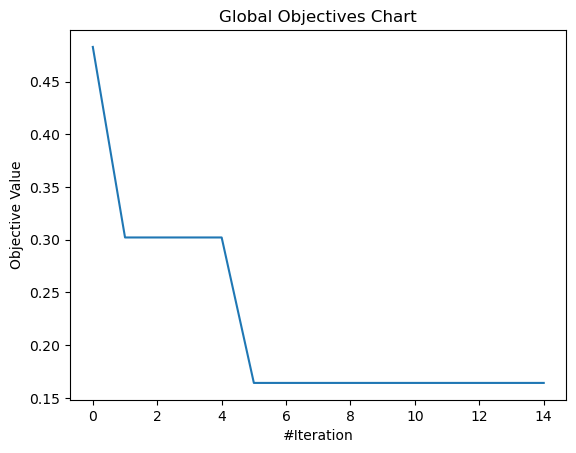

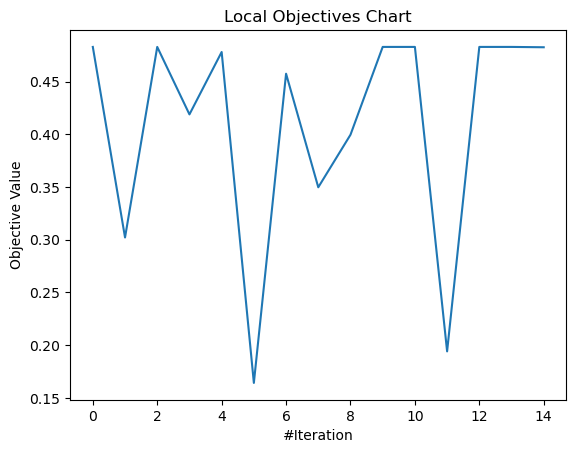

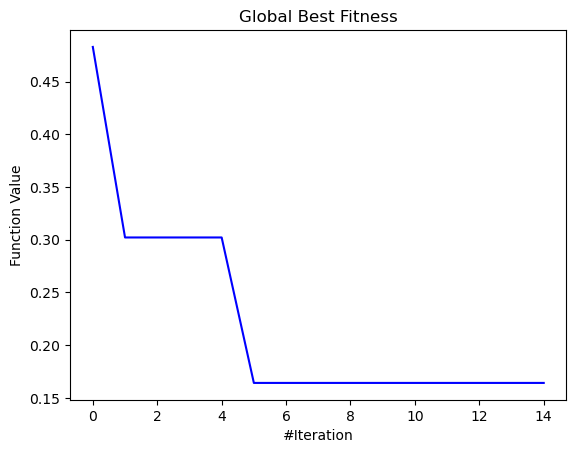

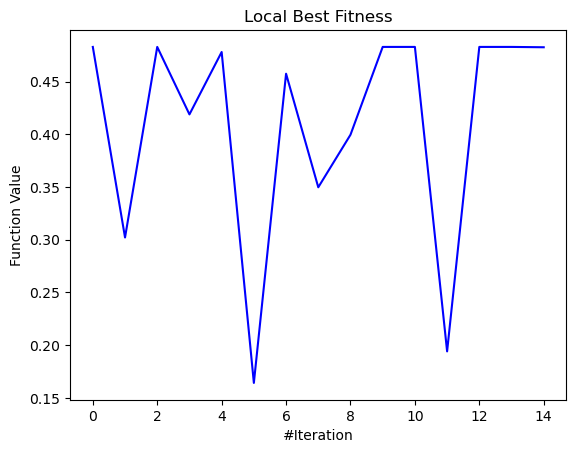

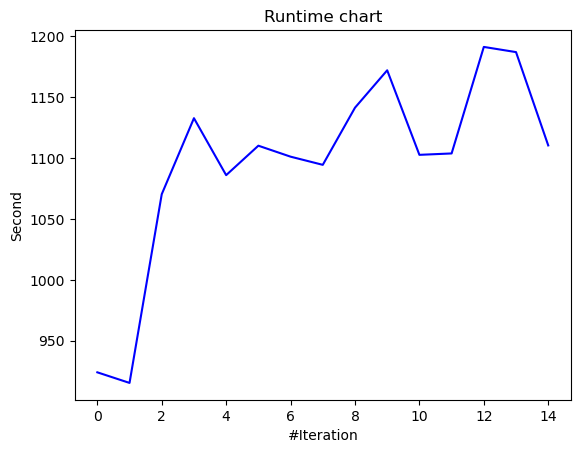

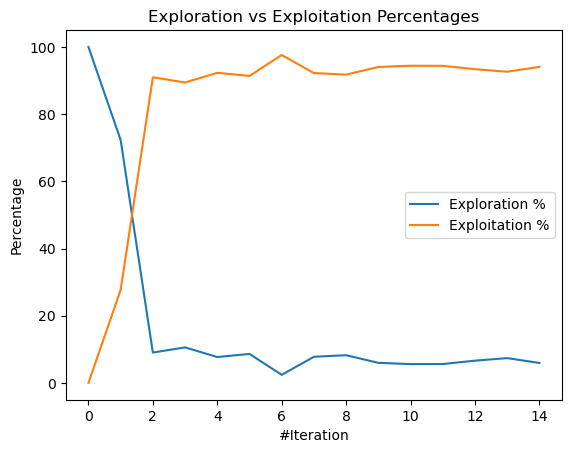

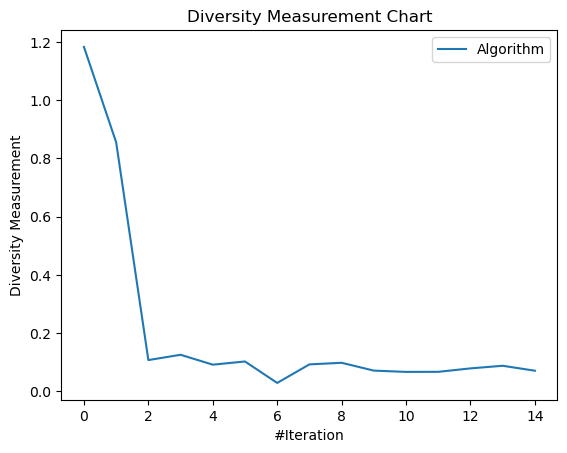

In [ ]:
BATCH_ENCODER = LabelEncoder()
BATCH_ENCODER.fit([32, 64, 128])

#act encoder --> Which activation function should be used?
ACT_ENCODER = LabelEncoder()
ACT_ENCODER.fit(['softmax', 'softplus', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'])

#Learning Rate encoder
LR_ENCODER = LabelEncoder()
LR_ENCODER.fit([0.0005, 0.001, 0.005, 0.01, 0.05, 0.1])

#Filter encoder
FILTER_ENCODER = LabelEncoder()
FILTER_ENCODER.fit([25, 50, 75])

#Hidden Units encoder
HIDDEN_ENCODER = LabelEncoder()
HIDDEN_ENCODER.fit([400, 512, 640])

def objective_function(params):
  '''RULES:
      Batch Size - 32, 64, 128
      Activation - softmax, softplus, relu, tanh, sigmoid, hard_sigmoid, linear
      Learning Rate - 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1
      Filters - 25, 50, 75
      Hidden Units - 400, 512, 640
      Dense Layers - 5, 8, 10
  '''
  batch_size = BATCH_ENCODER.inverse_transform([int(params[0])])[0]
  activation = ACT_ENCODER.inverse_transform([int(params[1])])[0]
  learning_rate = LR_ENCODER.inverse_transform([int(params[2])])[0]
  filter = FILTER_ENCODER.inverse_transform([int(params[3])])[0]
  hidden_units = HIDDEN_ENCODER.inverse_transform([int(params[4])])[0]

  model = tensorflow.keras.Sequential()
  model.add(tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1], X_rebalance.shape[2]))),
  model.add(tensorflow.keras.layers.Conv1D(filters=filter, kernel_size=3, activation='sigmoid')),
  model.add(tensorflow.keras.layers.MaxPooling1D(pool_size=2)),
  model.add(tensorflow.keras.layers.Dropout(0.3)),
  model.add(tensorflow.keras.layers.BatchNormalization()),
  model.add(tensorflow.keras.layers.LSTM(64)),
  model.add(tensorflow.keras.layers.Flatten()),
  model.add(tensorflow.keras.layers.Dense(int(hidden_units), activation=activation)),
  model.add(tensorflow.keras.layers.Dropout(0.5)),
  model.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))


  optimizer = tensorflow.keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  history = model.fit(X_rebalance, y_rebalance, batch_size=batch_size, epochs=15, validation_data=(X_validation_encode, y_validation_encode), verbose=0)
  min_validation_accuracy = 1-history.history['val_accuracy'][-1]
  print(f"Accuracy {min_validation_accuracy}")
  return min_validation_accuracy

LB = [0, 0, 0, 0, 0]
UB = [2.99, 6.99, 5.99, 2.99, 2.99]

problem_dict = {
    "obj_func": objective_function,
    "bounds": FloatVar(lb=LB, ub=UB),
    "minmax": "min",
    "verbose": True
}

model = FOX.OriginalFOX(epoch=15, pop_size=20)
g_best = model.solve(problem_dict)
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")
model.history.save_global_objectives_chart(filename="FOX-modbus/goc")
model.history.save_local_objectives_chart(filename="FOX-modbus/loc")

model.history.save_global_best_fitness_chart(filename="FOX-modbus/gbfc")
model.history.save_local_best_fitness_chart(filename="FOX-modbus/lbfc")

model.history.save_runtime_chart(filename="FOX-modbus/rtc")

model.history.save_exploration_exploitation_chart(filename="FOX-modbus/eec")

model.history.save_diversity_chart(filename="FOX-modbus/dc")


Solution: [0.00104305 0.00328664 0.00211226 0.00056036 0.00190117], Fitness: 0.16425585746765137

Batch Size - **32**, 64, 128

Activation - **softmax**, softplus, relu, tanh, sigmoid, hard_sigmoid, linear

Learning Rate - **0.0005**, 0.001, 0.005, 0.01, 0.05, 0.1

Filters - **25**, 50, 75

Hidden Units - **400**, 512, 640

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 4, 25)          │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 2, 25)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 25)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2, 25)          │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        23,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 400)            │        26,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,641 (193.91 KB)

 Trainable params: 49,591 (193.71 KB)

 Non-trainable params: 50 (200.00 B)

Epoch 1/70
805/805 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.5021 - loss: 0.6931 - val_accuracy: 0.5172 - val_loss: 0.6931
Epoch 2/70
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5044 - loss: 0.6931 - val_accuracy: 0.5172 - val_loss: 0.6931
Epoch 3/70
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4994 - loss: 0.6932 - val_accuracy: 0.5172 - val_loss: 0.6931
Epoch 4/70
805/805 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5056 - loss: 0.6931 - val_accuracy: 0.5172 - val_loss: 0.6931
Epoch 5/70
805/805 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5009 - loss: 0.6932 - val_accuracy: 0.5172 - val_loss: 0.6931
Epoch 6/70
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5016 - loss: 0.6931 - val_accuracy: 0.5172 - val_loss: 0.6931
Epoch 7/70
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4940 - loss: 0.6932 - val_accuracy: 0.5172 - val_loss: 0.6931
Epoch 8/70
805/805 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4975 - loss: 0.6932 - val_accuracy: 

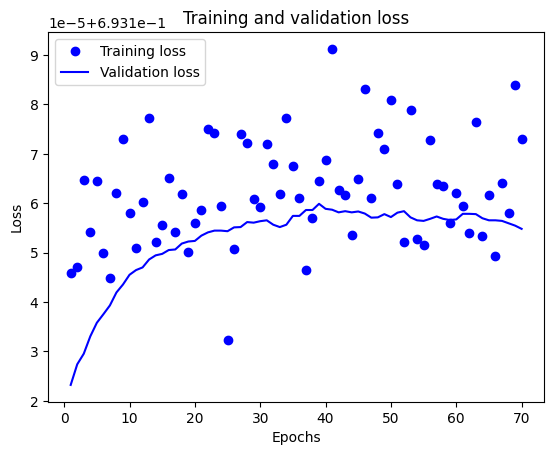

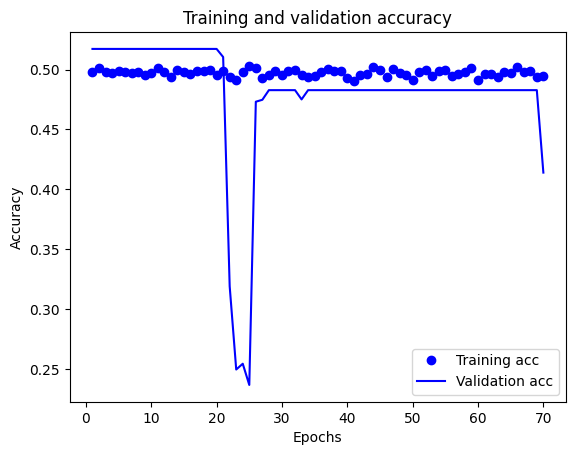


Classification Report
              precision    recall  f1-score   support

           0       0.44      0.85      0.58      1491
           1       0.06      0.01      0.02      1620

    accuracy                           0.41      3111
   macro avg       0.25      0.43      0.30      3111
weighted avg       0.24      0.41      0.29      3111


Confusion Matrix
[[1268  223]
 [1606   14]]


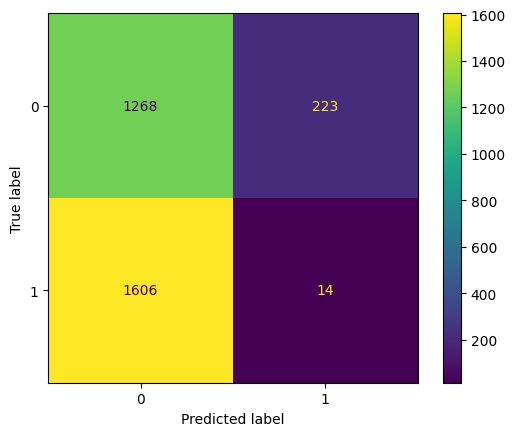

Time taken: 355.5433 seconds


In [ ]:
start_time_2 = time.perf_counter()
with tensorflow.device('/device:GPU:0'):
  # CNN model detection
  # https://keras.io/api/layers/activations/#softmax-function
  detection_model = tensorflow.keras.Sequential([
      tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1],X_rebalance.shape[2])),
      tensorflow.keras.layers.Conv1D(filters=25, kernel_size=3, activation='sigmoid'),
      tensorflow.keras.layers.MaxPooling1D(pool_size=2),
      tensorflow.keras.layers.Dropout(0.3),
      tensorflow.keras.layers.BatchNormalization(),
      tensorflow.keras.layers.LSTM(64),
      tensorflow.keras.layers.Flatten(),
      # 1 layer
      tensorflow.keras.layers.Dense(400, activation='softmax'),
      tensorflow.keras.layers.Dropout(0.5),
      # either attack or normal
      tensorflow.keras.layers.Dense(1, activation='sigmoid')
  ])

  detection_model.summary()
  # https://keras.io/api/losses/probabilistic_losses/#probabilistic-losses
  sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.0005)
  detection_model.compile(optimizer=sgd,
                loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

  history = detection_model.fit(X_rebalance, y_rebalance, batch_size=32, epochs=70, validation_data=(X_validation_encode, y_validation_encode))
  test_loss, test_acc = detection_model.evaluate(X_test_encode, y_test_encode)

  # Make predictions
  prediction = detection_model.predict(X_test_encode)
  print(prediction)
  attack_prediction = numpy.where(prediction > 0.5, 1, 0)
  print(attack_prediction)
  print(y_test)

  # Evaluate the model
  print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}\n")
  # https://www.tensorflow.org/tutorials/keras/text_classification for training and validation loss and accuracy
  history_dict = history.history
  # print(history_dict.keys())
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print("\n")

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  print("\nClassification Report")
  print(classification_report(y_test, attack_prediction))

  print("\nConfusion Matrix")
  print(confusion_matrix(y_test, attack_prediction))
  ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
  plt.show()

end_time2 = time.perf_counter()
print(f"Time taken: {end_time2 - start_time_2:0.4f} seconds")